In [3]:
!pip3 install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [5]:
CSV_PATH = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(CSV_PATH)

# Vista general
print("\nPrimeros datos")
df.head()
print("\nFilas y columnas")
df.shape
print("\nInformación del DataFrame")
df.info()
df.describe(include="all")


Primeros datos

Filas y columnas

Información del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


C:\Users\brian\AppData\Local\Temp\ipykernel_3868\1587480104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="viridis")


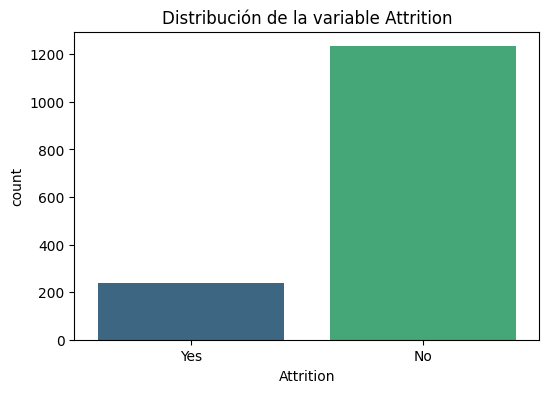

In [6]:
df.isnull().sum()
df.duplicated().sum()


plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="viridis")
plt.title("Distribución de la variable Attrition")
plt.show()



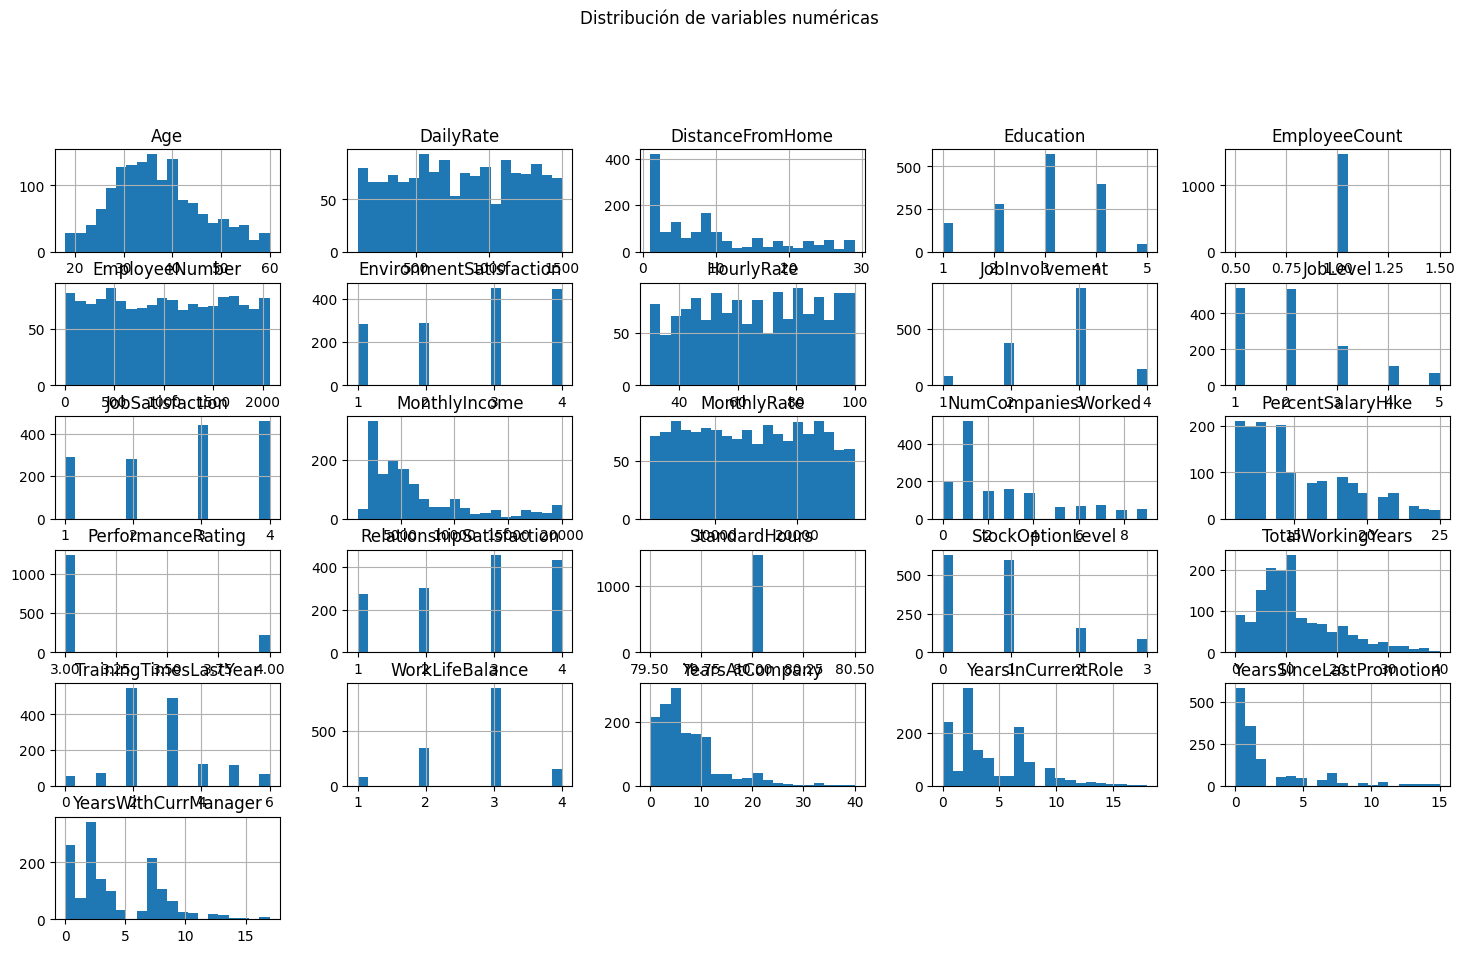

In [7]:
df_num = df.select_dtypes(include="number")
df_num.hist(bins=20, figsize=(18,10))
plt.suptitle("Distribución de variables numéricas", y=1.02)
plt.show()


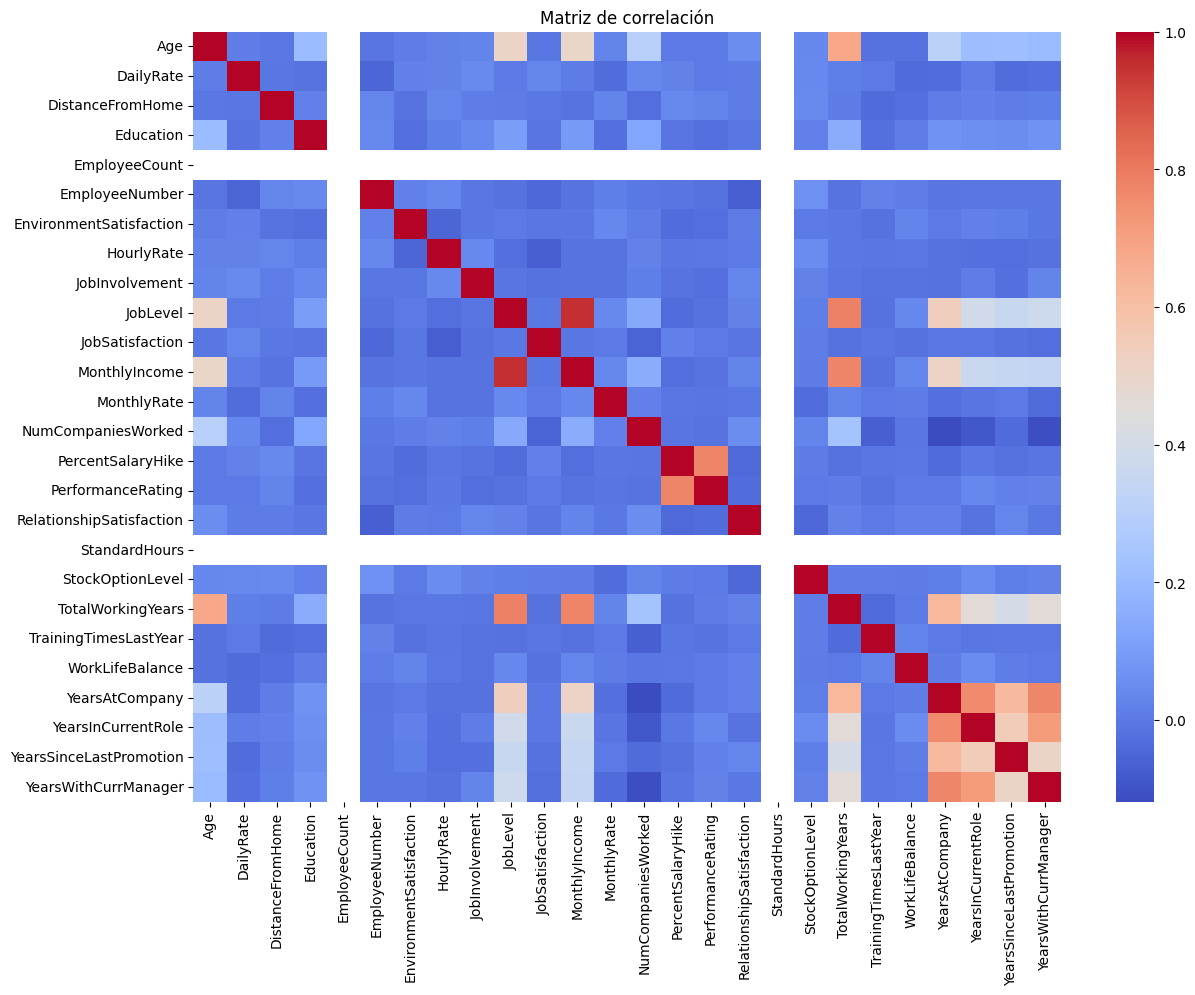

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df_num.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


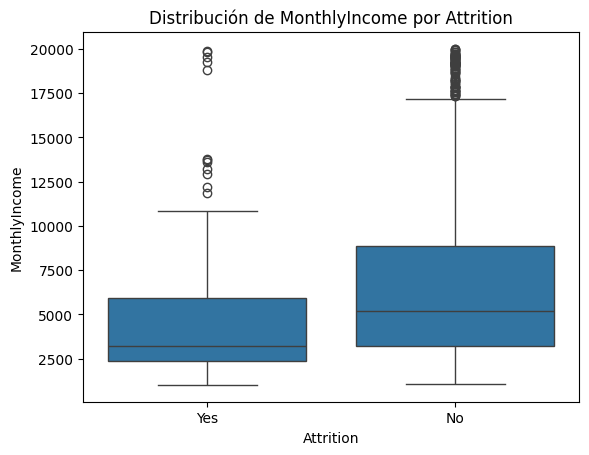

In [9]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Distribución de MonthlyIncome por Attrition")
plt.show()


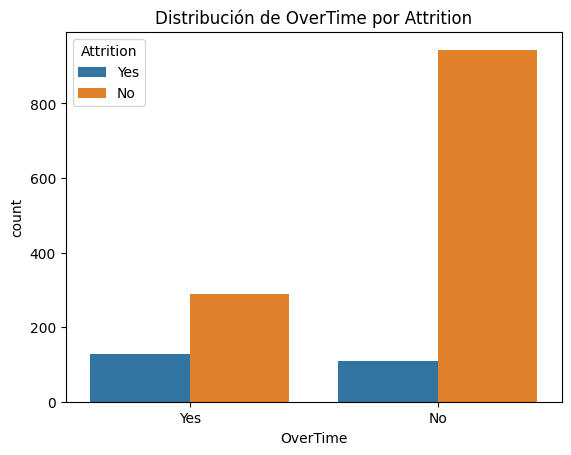

In [10]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Distribución de OverTime por Attrition")
plt.show()

## Punto 3: Preparación de los datos


In [11]:
#Eliminación de columnas irrelevantes
cols_remove = ["EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]
df = df.drop(columns=cols_remove)


#Aplicación de One Hot Encoding a variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)
#Escalado de variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [12]:
#Preparación de datos para el modelado, usando el Train Test Split


X = df_encoded.drop("Attrition_Yes", axis=1)
y = df_encoded["Attrition_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Entrenar los modelos
log_model = LogisticRegression(max_iter=200)
rf_model = RandomForestClassifier(random_state=42)

log_model.fit(X_train_res, y_train_res)
rf_model.fit(X_train_res, y_train_res)

# Predicciones
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluación
print("Logistic Regression")
print(classification_report(y_test, log_preds))
print("AUC:", roc_auc_score(y_test, log_preds))

print("\nRandom Forest")
print(classification_report(y_test, rf_preds))
print("AUC:", roc_auc_score(y_test, rf_preds))



C:\Users\brian\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
              precision    recall  f1-score   support

       False       0.89      0.75      0.81       247
        True       0.27      0.49      0.35        47

    accuracy                           0.71       294
   macro avg       0.58      0.62      0.58       294
weighted avg       0.79      0.71      0.74       294

AUC: 0.6211990696873115

Random Forest
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       247
        True       0.40      0.21      0.28        47

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294

AUC: 0.5760186062537687


In [15]:
import numpy as np
import pandas as pd

coeffs = pd.DataFrame({
    "feature": X.columns,
    "coef": log_model.coef_[0]
}).sort_values(by="coef", ascending=False)

print(coeffs)


                              feature      coef
21            YearsSinceLastPromotion  0.287032
11                 NumCompaniesWorked  0.272149
12                  PercentSalaryHike  0.147046
19                     YearsAtCompany  0.074723
13                  PerformanceRating  0.054801
43                       OverTime_Yes  0.047197
2                    DistanceFromHome  0.033898
0                                 Age  0.008348
42               MaritalStatus_Single  0.007868
5                          HourlyRate  0.007737
10                        MonthlyRate  0.000056
9                       MonthlyIncome -0.000042
1                           DailyRate -0.000096
40       JobRole_Sales Representative -0.005185
23   BusinessTravel_Travel_Frequently -0.012792
34      JobRole_Laboratory Technician -0.013712
33            JobRole_Human Resources -0.014613
39            JobRole_Sales Executive -0.014656
35                    JobRole_Manager -0.016622
26                   Department_Sales -0

In [16]:
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importances)


                              feature  importance
15                   StockOptionLevel    0.070740
9                       MonthlyIncome    0.057017
41              MaritalStatus_Married    0.052600
8                     JobSatisfaction    0.048410
22               YearsWithCurrManager    0.043296
0                                 Age    0.042239
4             EnvironmentSatisfaction    0.041475
10                        MonthlyRate    0.038075
6                      JobInvolvement    0.036308
7                            JobLevel    0.035071
25  Department_Research & Development    0.034227
1                           DailyRate    0.032197
5                          HourlyRate    0.031571
19                     YearsAtCompany    0.030722
16                  TotalWorkingYears    0.030345
2                    DistanceFromHome    0.030288
18                    WorkLifeBalance    0.029173
20                 YearsInCurrentRole    0.027934
29             EducationField_Medical    0.025054
